In [1]:
import time
import numpy as np
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
# fixar random seed para se puder reproduzir os resultados
seed = 9
np.random.seed(seed)

In [3]:
def load_fashion_mnist_dataset():
    from keras.datasets import fashion_mnist
    ((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()
    return (x_train, y_train), (x_test, y_test)


# Visualizar 6 imagens do mnist numa escala de cinzentos
def visualize_fashion_mnist():
    (X_train, y_train), (X_test, y_test) = load_fashion_mnist_dataset()
    plt.subplot(321)
    plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
    plt.subplot(322)
    plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
    plt.subplot(323)
    plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
    plt.subplot(324)
    plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
    plt.subplot(325)
    plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
    plt.subplot(326)
    plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
    plt.show()


def create_compile_model_mlp(num_pixels, num_classes):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels,
                    kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


# util para visualizar a topologia da rede num ficheiro em pdf ou png
def print_model(model, fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)


# utils para visualização do historial de aprendizagem
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def fashion_mnist_utilizando_mlp():
    (X_train, y_train), (X_test, y_test) = load_fashion_mnist_dataset()

    # transformar a matriz 28*28 das imagens num vector com 784 atributos para cada imagem (porque é multilayer-perceptron)
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255

    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o correspondente à posição
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    # output de 0 a 9 -> 10 possibilidades
    num_classes = y_test.shape[1]

    # definir a topologia da rede e compilar
    model = create_compile_model_mlp(num_pixels, num_classes)
    #print(model.summary())
    print_model(model, "model_fashion_mnist_mlp.png")
    plotlosses = PlotLossesKeras()

    # treinar a rede
    history = model.fit(X_train, y_train, validation_data=(
        X_test, y_test), epochs=10, batch_size=200, verbose=1, callbacks=[PlotLossesKeras()])
    
    #print_history_accuracy(history)
    #print_history_loss(history)

    # Avaliação final com os casos de teste
    scores = model.evaluate(X_test, y_test, verbose=0)

    #print('Scores: ', scores)
    print("Accuracy modelo MLP fashion mnist: %.2f%%" % (scores[1]*100))
    print("Erro modelo MLP fashion mnist: %.2f%%" % (100-scores[1]*100))

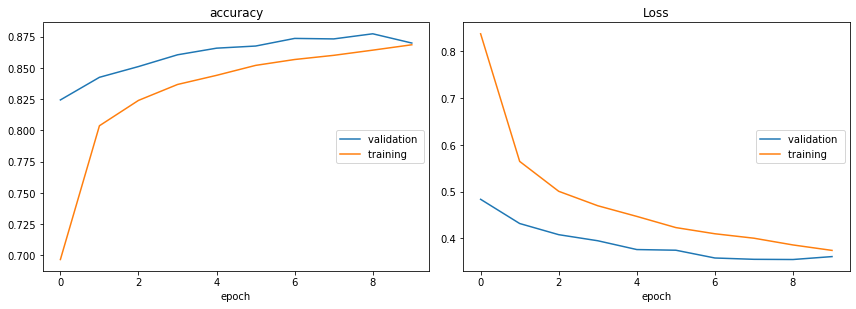

accuracy
	validation       	 (min:    0.824, max:    0.877, cur:    0.870)
	training         	 (min:    0.697, max:    0.868, cur:    0.868)
Loss
	validation       	 (min:    0.355, max:    0.483, cur:    0.361)
	training         	 (min:    0.374, max:    0.838, cur:    0.374)
Accuracy modelo MLP fashion mnist: 86.98%
Erro modelo MLP fashion mnist: 13.02%
Tempo processamento: 77.544 segundos


In [4]:
if __name__ == '__main__':
    start_time = time.time()
    #visualize_fashio_mnist()
    fashion_mnist_utilizando_mlp()
    time_taken = time.time() - start_time
    print("Tempo processamento: %.3f segundos" % (time_taken))